In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import geemap
import ee
Map=geemap.Map()
Map

*** Earth Engine *** FINAL DEADLINE: ee.Authenticate will fail after 2022-06-06. Please upgrade. https://developers.google.com/earth-engine/guides/python_install


Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

# 制图（PW and SW）

## Our result

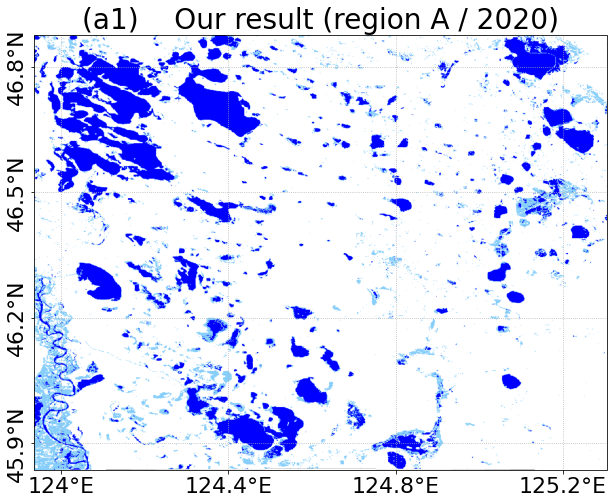

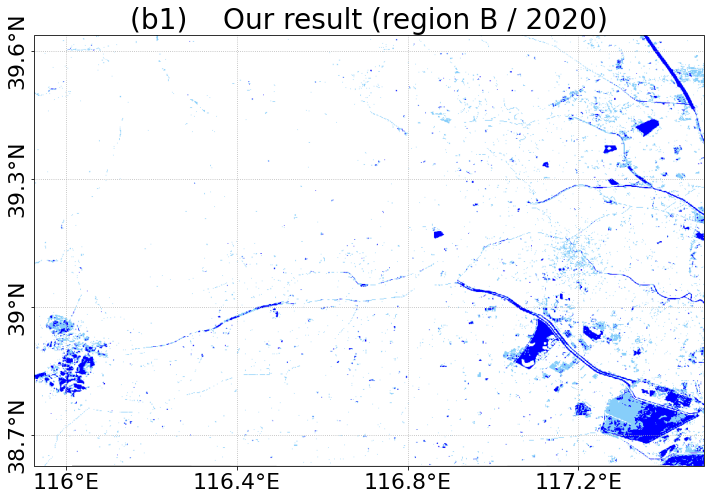

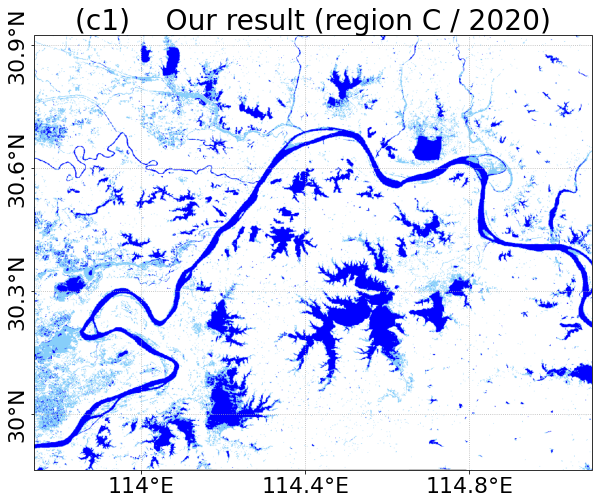

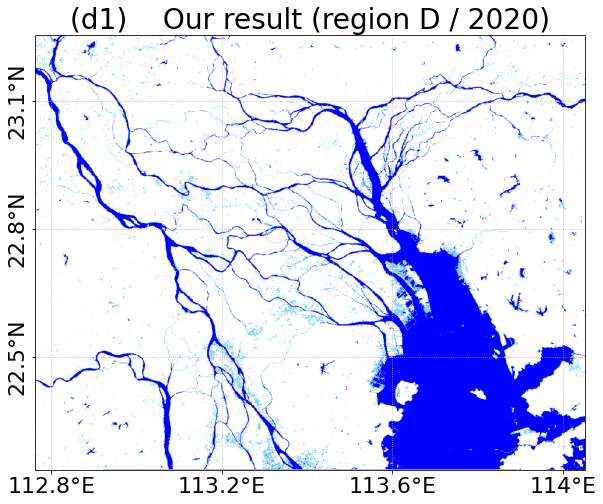

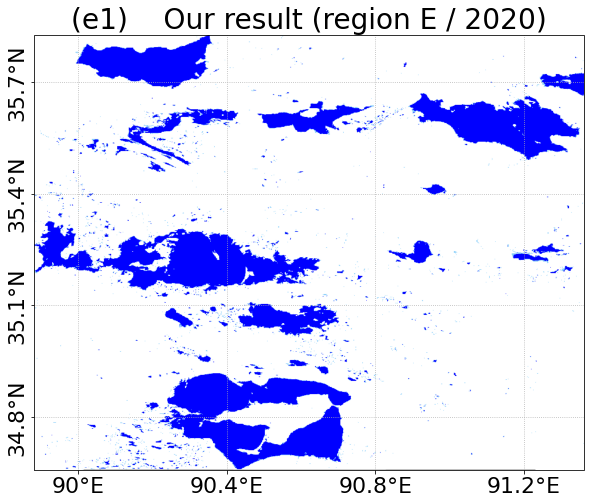

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
item = [['region A','daqing','(a1)'],['region B','tianjin','(b1)'],['region C','wuhan','(c1)'],['region D','prd','(d1)'],['region E','tibet','(e1)']]
for it in item:
    if it[0] == 'region A':
        re = [125.3055, 45.8362, 123.9355, 46.8762]
    elif it[0] == 'region B':
        re = [117.4944, 38.6272, 115.9244, 39.6372]
    elif it[0] == 'region C':
        re = [115.0993, 29.8642, 113.7393, 30.9242]
    elif it[0] == 'region D':
        re = [114.0514, 22.2347, 112.7614, 23.2547]  
    elif it[0] == 'region E':
        re = [91.3626, 34.6579, 89.8826, 35.8279]
    
    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 2,'palette':['#FFFFFF','#87CEFA','#0000FF']}
    
    basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('waterclass')
    frequency = ee.Image('users/311605001111/WF/' + it[1] + '_WF_2020')
    permanent = frequency.gte(0.75).remap([0,1],[0,2]).rename('waterclass')
    season = ee.ImageCollection([frequency.gte(0.25),frequency.lt(0.75)]).sum().eq(2).rename('waterclass')
    pw = ee.ImageCollection([permanent,season]).sum().visualize(**vis)
    
    ax = cartoee.get_map(pw,region=re)
    cartoee.add_gridlines(ax, interval=[0.4,0.3], linestyle=":", ytick_rotation="vertical")
    # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="right",label="water frequency", orientation="vertical")
    # ax.set_title(label = it[0] + ' (1999-2020)', fontsize=20)
    ax.tick_params(labelsize=22)
    ax.set_title(label = it[2] + '    Our result ' + '(' + it[0] + ' / 2020)', fontsize=28)

## Our result (w/o)

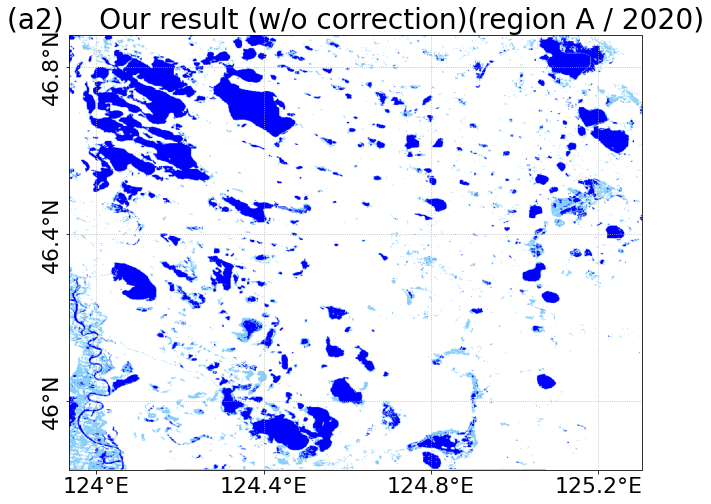

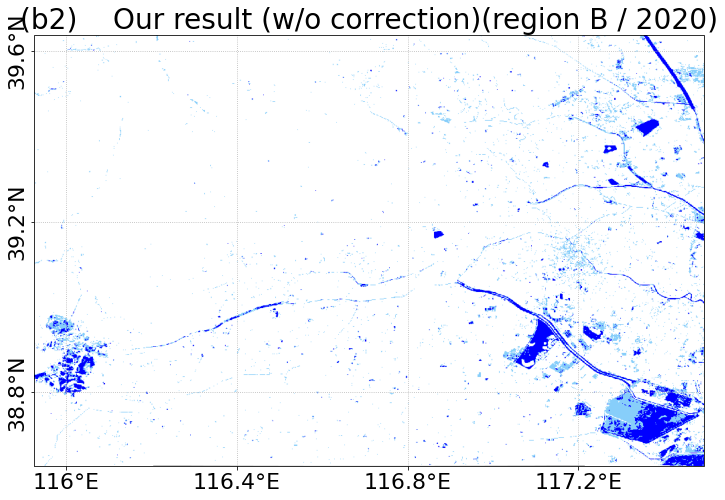

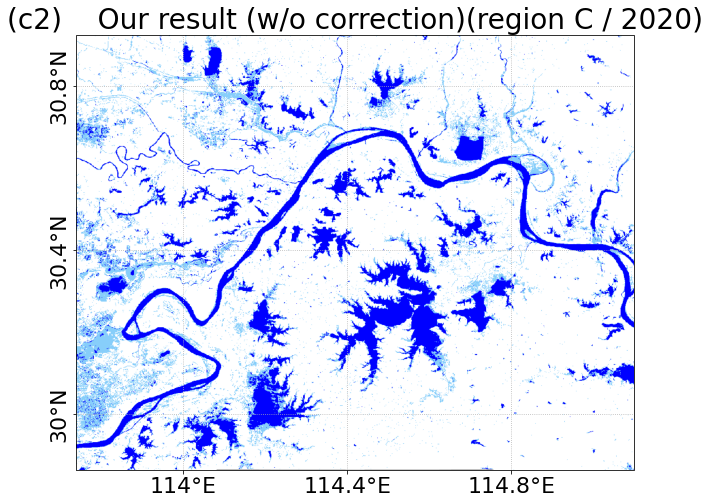

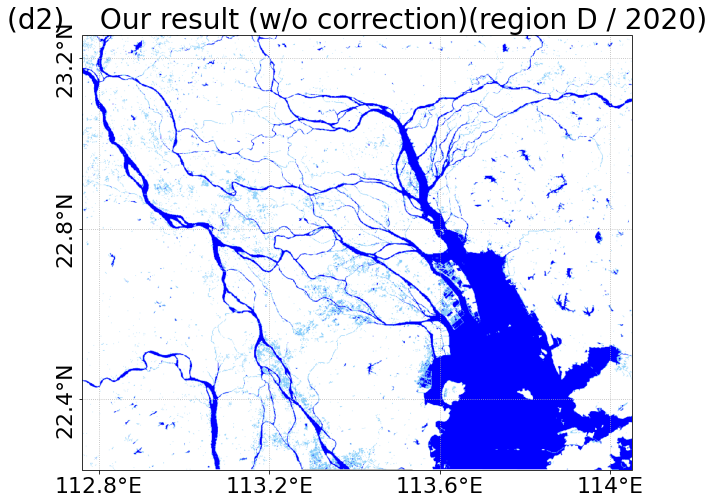

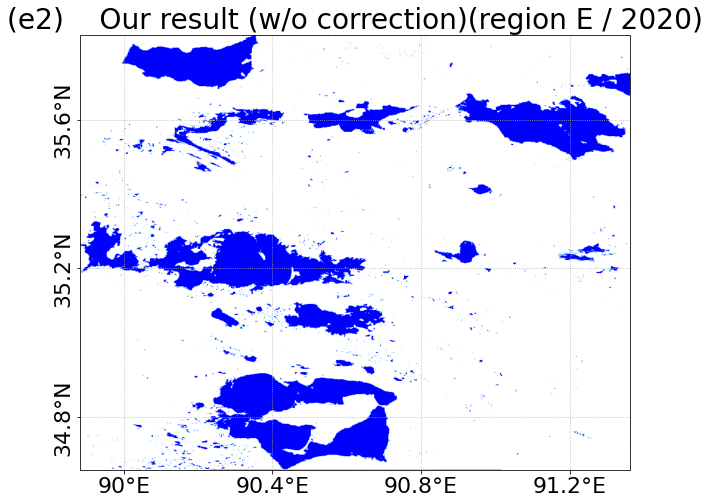

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
item = [['region A','daqing','(a2)'],['region B','tianjin','(b2)'],['region C','wuhan','(c2)'],['region D','prd','(d2)'],['region E','tibet','(e2)']]
for it in item:
    if it[0] == 'region A':
        re = [125.3055, 45.8362, 123.9355, 46.8762]
    elif it[0] == 'region B':
        re = [117.4944, 38.6272, 115.9244, 39.6372]
    elif it[0] == 'region C':
        re = [115.0993, 29.8642, 113.7393, 30.9242]
    elif it[0] == 'region D':
        re = [114.0514, 22.2347, 112.7614, 23.2547]  
    elif it[0] == 'region E':
        re = [91.3626, 34.6579, 89.8826, 35.8279]
    
    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 2,'palette':['#FFFFFF','#87CEFA','#0000FF']}
    
    basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('waterclass')
    frequency = ee.Image('users/311605001111/WF_nocorrect/' + it[1] + '_WF_2020')
    permanent = frequency.gte(0.75).remap([0,1],[0,2]).rename('waterclass')
    season= ee.ImageCollection([frequency.gte(0.25),frequency.lt(0.75)]).sum().eq(2).rename('waterclass')
    pw = ee.ImageCollection([permanent,season,basemap]).sum().visualize(**vis)
    
    ax = cartoee.get_map(pw,region=re)
    cartoee.add_gridlines(ax, interval=[0.4,0.4], linestyle=":", ytick_rotation="vertical")
    # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="right",label="water frequency", orientation="vertical")
    # ax.set_title(label = it[0] + ' (1999-2020)', fontsize=20)
    ax.tick_params(labelsize=22)
    ax.set_title(label = it[2] + '    Our result (w/o correction)' + '(' + it[0] + ' / 2020)', fontsize=28)

## JRC

In [ ]:
visualization = {'min': 0.0,'max': 3.0,'palette': ['#FFFFFF', '#FFFFFF','#87CEFA','#0000FF']}


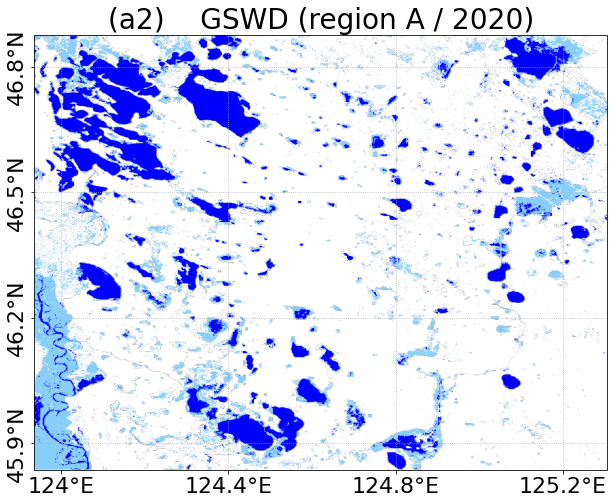

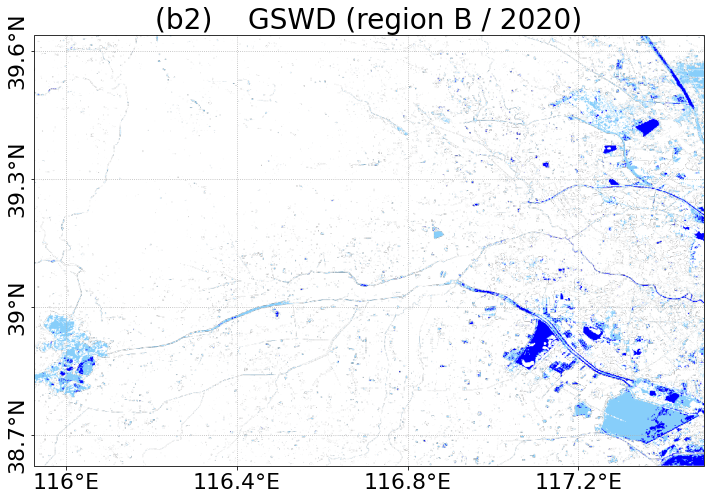

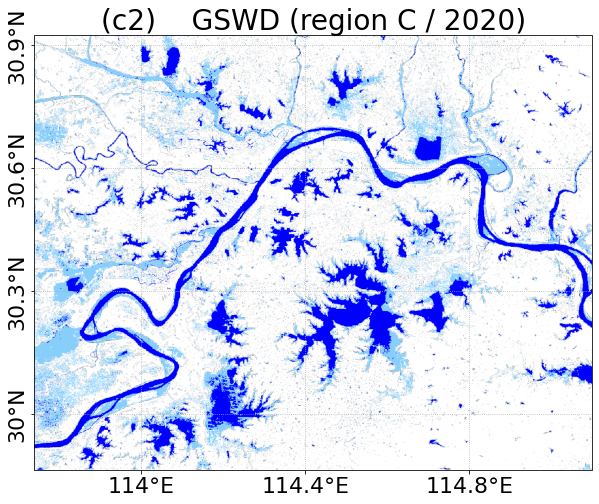

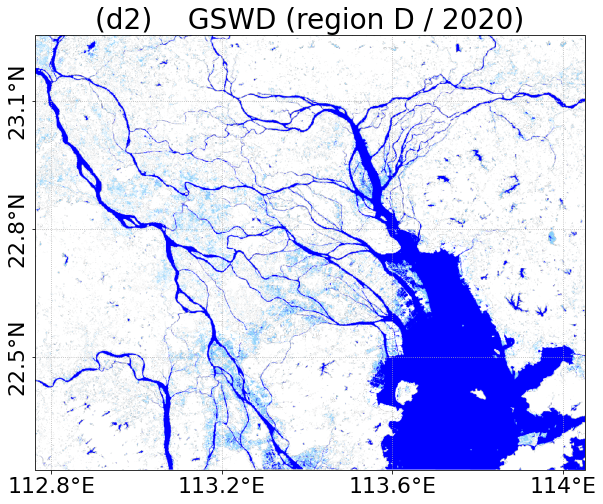

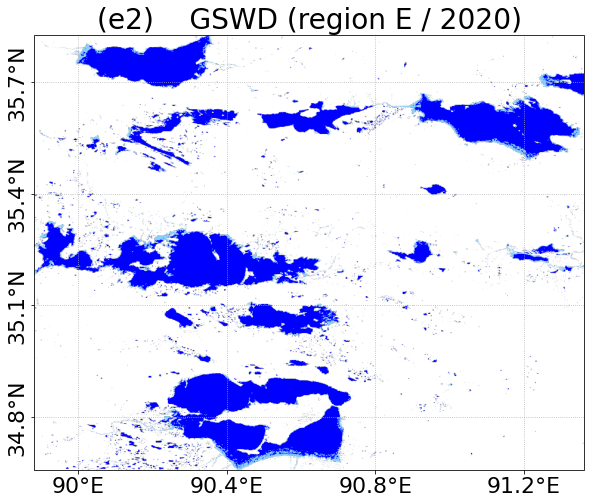

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
item = [['region A','daqing','(a2)'],['region B','tianjin','(b2)'],['region C','wuhan','(c2)'],['region D','prd','(d2)'],['region E','tibet','(e2)']]
# item = [['region A','daqing','(a3)'],['region B','tianjin','(b3)'],['region C','wuhan','(c3)'],['region D','prd','(d3)'],['region E','tibet','(e3)']]
for it in item:
    if it[0] == 'region A':
        re = [125.3055, 45.8362, 123.9355, 46.8762]
    elif it[0] == 'region B':
        re = [117.4944, 38.6272, 115.9244, 39.6372]
    elif it[0] == 'region C':
        re = [115.0993, 29.8642, 113.7393, 30.9242]
    elif it[0] == 'region D':
        re = [114.0514, 22.2347, 112.7614, 23.2547]  
    elif it[0] == 'region E':
        re = [91.3626, 34.6579, 89.8826, 35.8279]
    
    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 2,'palette':['#FFFFFF','#87CEFA','#0000FF']}
    
    basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/YearlyHistory/2020').clip(ee.Geometry.Rectangle(re)).remap([0,1,2,3],[0,0,1,2]).rename('waterclass')
    pw = ee.ImageCollection([JRC]).sum().visualize(**vis)
      
    ax = cartoee.get_map(pw,region=re)
    cartoee.add_gridlines(ax, interval=[0.4,0.3], linestyle=":", ytick_rotation="vertical")
    # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="right",label="water frequency", orientation="vertical")
    ax.tick_params(labelsize=22)
    ax.set_title(label = it[2] + '    GSWD ' + '(' + it[0] + ' / 2020)', fontsize=28)

## Maryland

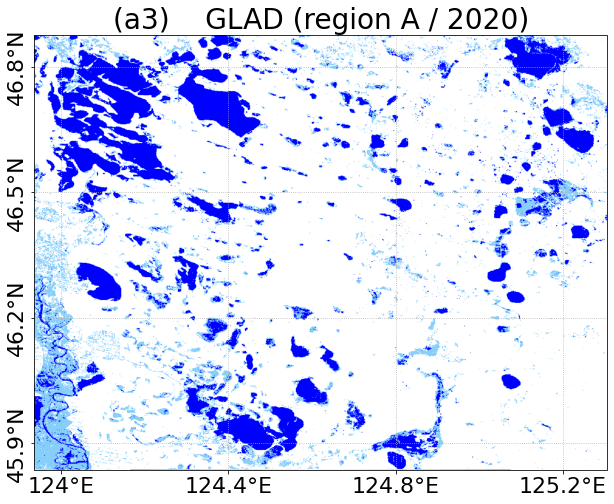

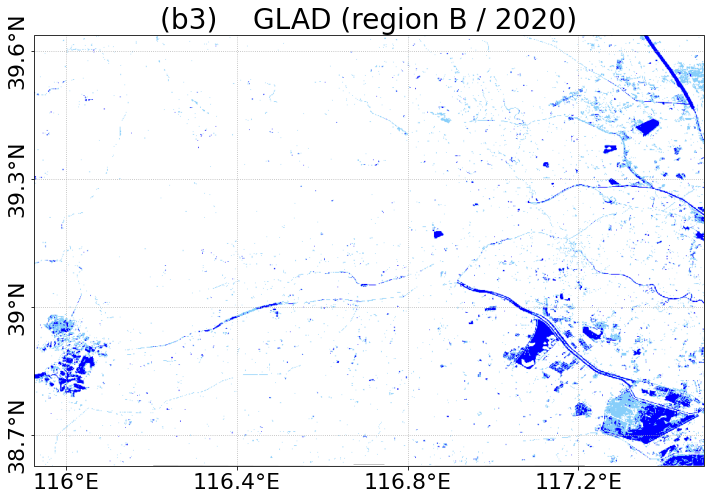

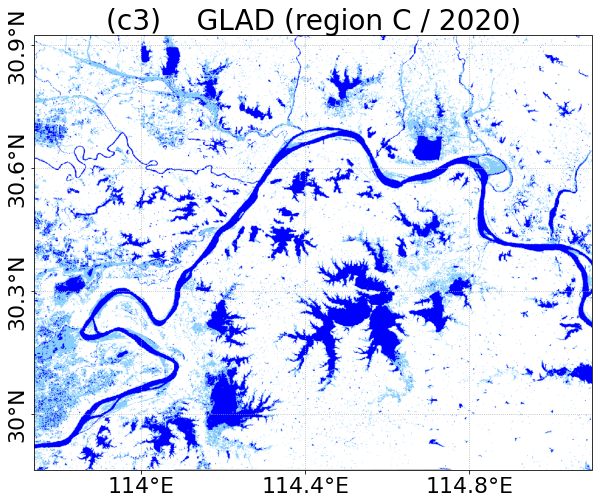

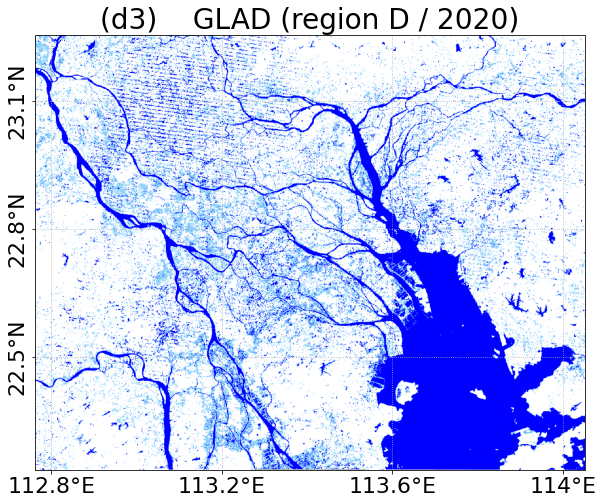

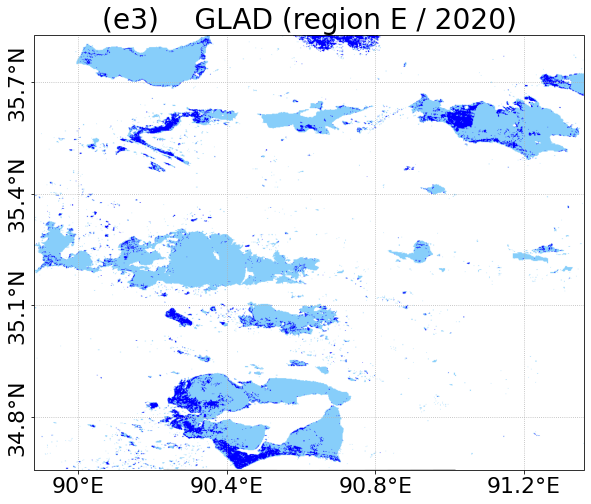

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee

# item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
item = [['region A','daqing','(a3)'],['region B','tianjin','(b3)'],['region C','wuhan','(c3)'],['region D','prd','(d3)'],['region E','tibet','(e3)']]
# item = [['region A','daqing','(a4)'],['region B','tianjin','(b4)'],['region C','wuhan','(c4)'],['region D','prd','(d4)'],['region E','tibet','(e4)']]

for it in item:
    if it[0] == 'region A':
        re = [125.3055, 45.8362, 123.9355, 46.8762]
    elif it[0] == 'region B':
        re = [117.4944, 38.6272, 115.9244, 39.6372]
    elif it[0] == 'region C':
        re = [115.0993, 29.8642, 113.7393, 30.9242]
    elif it[0] == 'region D':
        re = [114.0514, 22.2347, 112.7614, 23.2547]  
    elif it[0] == 'region E':
        re = [91.3626, 34.6579, 89.8826, 35.8279]
    
    fig = plt.figure(figsize=(12, 8))
    vis = {'min': 0,'max': 2,'palette':['#FFFFFF','#87CEFA','#0000FF']}
    
    basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('waterclass')
    Maryland = ee.Image('users/311605001111/Maryland/Maryland_nationwide_2020').clip(ee.Geometry.Rectangle(re)).select('b1').rename('waterclass')
    Maryland_permanent = Maryland.select('waterclass').gte(75).remap([0,1],[0,2]).rename('waterclass')
    Maryland_season= ee.ImageCollection([Maryland.gte(25),Maryland.lt(75)]).sum().eq(2)
    pw = ee.ImageCollection([Maryland_permanent,Maryland_season]).sum().visualize(**vis)
    
    # basemap = ee.Image.constant(0).clip(ee.Geometry.Rectangle(re)).rename('waterclass')
    # Maryland = ee.Image("users/311605001111/MARYLAND_99-20").clip(ee.Geometry.Rectangle(re)).select('b1').rename('waterclass')
    # Maryland_permanent = Maryland.select('waterclass').eq(2).remap([0,1],[0,2]).rename('waterclass')
    # Maryland_season= Maryland.select('waterclass').eq(7).rename('waterclass')
    # pw = ee.ImageCollection([Maryland_permanent,Maryland_season,basemap]).sum().visualize(**vis)
    
    ax = cartoee.get_map(pw,region=re)
    cartoee.add_gridlines(ax, interval=[0.4,0.3], linestyle=":", ytick_rotation="vertical")
    # cartoee.add_colorbar(ax, vis,cmap = 'Blues',loc="right",label="water frequency", orientation="vertical")
    # ax.set_title(label = it[0] + ' (1999-2020)', fontsize=20)
    ax.tick_params(labelsize=22)
    ax.set_title(label = it[2] + '    GLAD ' + '(' + it[0] + ' / 2020)', fontsize=28)

# 面积（PW,SW,max）

In [ ]:
pw_pw_area = pw.eq(2).multiply(ee.Image.pixelArea()).divide(1e6)
areas = pw_pw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
print('PW: ',areas.get('waterclass').getInfo())
pwater.append(areas.get('waterclass').getInfo())
    
pw_sw_area = pw.eq(1).multiply(ee.Image.pixelArea()).divide(1e6)
areas = pw_sw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
print('SW: ',areas.get('waterclass').getInfo())
swater.append(areas.get('waterclass').getInfo())
    
pw_max_area = pw.gt(0).multiply(ee.Image.pixelArea()).divide(1e6)
areas = pw_max_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
print('MW: ',areas.get('waterclass').getInfo())
mwater.append(areas.get('waterclass').getInfo())

## Our result

In [ ]:
pwater = []
swater = []
mwater = []

item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
    
    roi = ee.Geometry.Rectangle(re)
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    frequency = ee.Image('users/311605001111/WF/' + it[1] + '_WF_2020')
    permanent = frequency.gte(0.75).remap([0,1],[0,2]).rename('waterclass')
    season= ee.ImageCollection([frequency.gte(0.25),frequency.lt(0.75)]).sum().eq(2).rename('waterclass')
    pw = ee.ImageCollection([permanent,season]).sum()
    
    pw_pw_area = pw.eq(2).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_pw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('PW: ',areas.get('waterclass').getInfo())
    pwater.append(areas.get('waterclass').getInfo())
    
    pw_sw_area = pw.eq(1).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_sw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('SW: ',areas.get('waterclass').getInfo())
    swater.append(areas.get('waterclass').getInfo())
    
    pw_max_area = pw.gt(0).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_max_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('MW: ',areas.get('waterclass').getInfo())
    mwater.append(areas.get('waterclass').getInfo())

In [ ]:
print(pwater)
print(swater)
print(mwater)

## Our result (w/o)

In [ ]:
pwater = []
swater = []
mwater = []


item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
    
    
    roi = ee.Geometry.Rectangle(re)
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    frequency = ee.Image('users/311605001111/WF_nocorrect/' + it[1] + '_WF_2020')
    permanent = frequency.gte(0.75).remap([0,1],[0,2]).rename('waterclass')
    season= ee.ImageCollection([frequency.gte(0.25),frequency.lt(0.75)]).sum().eq(2).rename('waterclass')
    pw = ee.ImageCollection([permanent,season]).sum()
    
    pw_pw_area = pw.eq(2).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_pw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('PW: ',areas.get('waterclass').getInfo())
    pwater.append(areas.get('waterclass').getInfo())
    
    pw_sw_area = pw.eq(1).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_sw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('SW: ',areas.get('waterclass').getInfo())
    swater.append(areas.get('waterclass').getInfo())
    
    pw_max_area = pw.gt(0).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_max_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('MW: ',areas.get('waterclass').getInfo())
    mwater.append(areas.get('waterclass').getInfo())

In [ ]:
print(pwater)
print(swater)
print(mwater)

## JRC

In [ ]:
pwater = []
swater = []
mwater = []

item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
   
    roi = ee.Geometry.Rectangle(re)
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/YearlyHistory/2020').clip(ee.Geometry.Rectangle(re)).remap([0,1,2,3],[0,0,1,2]).rename('waterclass')
    pw = ee.ImageCollection([JRC,basemap]).sum()
    
    pw_pw_area = pw.eq(2).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_pw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('PW: ',areas.get('waterclass').getInfo())
    pwater.append(areas.get('waterclass').getInfo())
    
    pw_sw_area = pw.eq(1).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_sw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('SW: ',areas.get('waterclass').getInfo())
    swater.append(areas.get('waterclass').getInfo())
    
    pw_max_area = pw.gt(0).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_max_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('MW: ',areas.get('waterclass').getInfo())
    mwater.append(areas.get('waterclass').getInfo())

In [ ]:
print(pwater)
print(swater)
print(mwater)

In [ ]:
pwater = []
swater = []
mwater = []

item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
   
    roi = ee.Geometry.Rectangle(re)
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    JRC = ee.Image('JRC/GSW1_3/YearlyHistory/2020').clip(ee.Geometry.Rectangle(re)).remap([0,1,2,3],[0,0,1,2]).rename('waterclass')
    pw = ee.ImageCollection([JRC]).sum()
    
    pw_pw_area = pw.eq(2).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_pw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('PW: ',areas.get('waterclass').getInfo())
    pwater.append(areas.get('waterclass').getInfo())
    
    pw_sw_area = pw.eq(1).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_sw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('SW: ',areas.get('waterclass').getInfo())
    swater.append(areas.get('waterclass').getInfo())
    
    pw_max_area = pw.gt(0).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_max_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('MW: ',areas.get('waterclass').getInfo())
    mwater.append(areas.get('waterclass').getInfo())

In [ ]:
print(pwater)
print(swater)
print(mwater)

## Maryland

In [ ]:
pwater = []
swater = []
mwater = []


item = [['region A','daqing'],['region B','tianjin'],['region C','wuhan'],['region D','prd'],['region E','tibet']]
for it in item:
    if it[0] == 'region A':
        re = [123.9355, 45.8362,125.3055, 46.8762]
    elif it[0] == 'region B':
        re = [115.9244, 38.6272,117.4944,39.6372]
    elif it[0] == 'region C':
        re = [113.7393, 29.8642,115.0993, 30.9242]
    elif it[0] == 'region D':
        re = [112.7614, 22.2347,114.0514, 23.2547]   
    elif it[0] == 'region E':
        re = [89.8826, 34.6579,91.3626, 35.8279]
    
    roi = ee.Geometry.Rectangle(re)
    basemap = ee.Image.constant(0).clip(roi).rename('waterclass')
    Maryland = ee.Image('users/311605001111/Maryland/Maryland_nationwide_2020').clip(ee.Geometry.Rectangle(re)).select('b1').rename('waterclass')
    Maryland_permanent = Maryland.select('waterclass').gte(75).remap([0,1],[0,2]).rename('waterclass')
    Maryland_season= ee.ImageCollection([Maryland.gte(25),Maryland.lt(75)]).sum().eq(2)
    pw = ee.ImageCollection([Maryland_permanent,Maryland_season]).sum()
    
    pw_pw_area = pw.eq(2).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_pw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('PW: ',areas.get('waterclass').getInfo())
    pwater.append(areas.get('waterclass').getInfo())
    
    pw_sw_area = pw.eq(1).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_sw_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('SW: ',areas.get('waterclass').getInfo())
    swater.append(areas.get('waterclass').getInfo())
    
    pw_max_area = pw.gt(0).multiply(ee.Image.pixelArea()).divide(1e6)
    areas = pw_max_area.reduceRegion(**{'reducer': ee.Reducer.sum(),'geometry': roi,'scale': 30,'maxPixels': 1e14 })
    print('MW: ',areas.get('waterclass').getInfo())
    mwater.append(areas.get('waterclass').getInfo())

In [ ]:
print(pwater)
print(swater)
print(mwater)

## 制图（折线图）

In [ ]:
# our reslut
[1490.752448627536, 480.72048749873306, 1950.8500655553341, 2376.009531193849, 2581.5993344516532]
[740.7061307759773, 426.88490261575186, 1097.3946376139959, 502.8315136429785, 85.37038470896323]
[2231.4585794034697, 907.6053901144783, 3048.24470316962, 2878.841044836961, 2666.969719160655]

# our result(w/o)
[1491.7253411236336, 480.720487498733, 1950.1627886626038, 2481.672433873879, 2576.1392900871397]
[729.203134583573, 426.88490261575197, 1104.164178485876, 413.753945866611, 70.05691545083553]
[2220.9284757071878, 907.6053901144784, 3054.326967148784, 2895.426379740604, 2646.1962055379317]

# JRC
[1270.5912651312842, 247.74168959419922, 1450.0363113039618, 2444.784686865636, 2402.6595789150397]
[1191.7637963498066, 723.1311780824421, 1816.1106822093943, 899.4327867543972, 333.5326834051631]
[2462.3550614810474, 970.8728676765952, 3266.146993513572, 3344.217473620183, 2736.1922623204036]

# Maryland

[1553.017276000532, 470.3998861190408, 2200.3939879603254, 3188.254255319527, 584.7574065362359]
[1130.8228912874824, 453.22009005292784, 1536.2932575190557, 1389.8543841953726, 2109.803957145855]
[2683.84016728796, 923.6199761719547, 3736.687245479658, 4578.108639515131, 2694.5613636820785]

In [ ]:
# PW
our = [1490.752448627536, 480.72048749873306, 1950.8500655553341, 2376.009531193849, 2581.5993344516532]
our_wo = [1491.7253411236336, 480.720487498733, 1950.1627886626038, 2481.672433873879, 2576.1392900871397]
jrc = [1270.5912651312842, 247.74168959419922, 1450.0363113039618, 2444.784686865636, 2402.6595789150397]
maryland = [1553.017276000532, 470.3998861190408, 2200.3939879603254, 3188.254255319527, 584.7574065362359]

# # SW
# our = [740.7061307759773, 426.88490261575186, 1097.3946376139959, 502.8315136429785, 85.37038470896323]
# our_wo = [729.203134583573, 426.88490261575197, 1104.164178485876, 413.753945866611, 70.05691545083553]
# jrc = [1191.7637963498066, 723.1311780824421, 1816.1106822093943, 899.4327867543972, 333.5326834051631]
# maryland = [1130.8228912874824, 453.22009005292784, 1536.2932575190557, 1389.8543841953726, 2109.803957145855]


# # MW
# our = [2231.4585794034697, 907.6053901144783, 3048.24470316962, 2878.841044836961, 2666.969719160655]
# our_wo = [2220.9284757071878, 907.6053901144784, 3054.326967148784, 2895.426379740604, 2646.1962055379317]
# jrc = [2462.3550614810474, 970.8728676765952, 3266.146993513572, 3344.217473620183, 2736.1922623204036]
# maryland = [2683.84016728796, 923.6199761719547, 3736.687245479658, 4578.108639515131, 2694.5613636820785]

In [ ]:
# PW
our = [1490.752448627536, 480.72048749873306, 1950.8500655553341, 2376.009531193849, 2581.5993344516532]
our_wo = [1491.7253411236336, 480.720487498733, 1950.1627886626038, 2481.672433873879, 2576.1392900871397]
jrc = [1270.5912651312842, 247.74168959419922, 1450.0363113039618, 2444.784686865636, 2402.6595789150397]
maryland = [1553.017276000532, 470.3998861190408, 2200.3939879603254, 3188.254255319527, 584.7574065362359]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12,8))
year = np.arange(1,6,1)
plt.plot(year, our,'*-b' ,label = 'Our result')
# plt.plot(year, our_wo,'o-.m' ,label = 'Our result (w/o correction)')
plt.plot(year, jrc,'^--r',label = 'GSWD')
plt.plot(year, maryland,'x:g',label = 'GLAD')

# plt.title("Area change in various water (region C / 2000-2020)", fontsize=18)
plt.title("(a)        Area of PW in each areas (2020)", fontsize=24)
plt.xlabel("Region", fontsize=24)
plt.ylabel('Area/km²', fontsize=24)

plt.ylim(0,5000)
plt.tick_params(labelsize=22)
plt.xticks([1,2,3,4,5],['region A','region B','region C','region D','region E'])
plt.legend(prop={'size':22},loc='upper left')
plt.show()

In [ ]:
# SW
our = [740.7061307759773, 426.88490261575186, 1097.3946376139959, 502.8315136429785, 85.37038470896323]
our_wo = [729.203134583573, 426.88490261575197, 1104.164178485876, 413.753945866611, 70.05691545083553]
jrc = [1191.7637963498066, 723.1311780824421, 1816.1106822093943, 899.4327867543972, 333.5326834051631]
maryland = [1130.8228912874824, 453.22009005292784, 1536.2932575190557, 1389.8543841953726, 2109.803957145855]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12,8))
year = np.arange(1,6,1)
plt.plot(year, our,'*-b' ,label = 'Our result')
# plt.plot(year, our_wo,'o-.m' ,label = 'Our result (w/o correction)')
plt.plot(year, jrc,'^--r',label = 'GSWD')
plt.plot(year, maryland,'x:g',label = 'GLAD')

# plt.title("Area change in various water (region C / 2000-2020)", fontsize=18)
plt.title("(b)        Area of SW in each areas (2020)", fontsize=24)
plt.xlabel("Region", fontsize=24)
plt.ylabel('Area/km²', fontsize=24)

plt.ylim(0,5000)
plt.tick_params(labelsize=22)
plt.xticks([1,2,3,4,5],['region A','region B','region C','region D','region E'])
plt.legend(prop={'size':22},loc='upper left')
plt.show()

In [ ]:
# # MW
our = [2231.4585794034697, 907.6053901144783, 3048.24470316962, 2878.841044836961, 2666.969719160655]
our_wo = [2220.9284757071878, 907.6053901144784, 3054.326967148784, 2895.426379740604, 2646.1962055379317]
jrc = [2462.3550614810474, 970.8728676765952, 3266.146993513572, 3344.217473620183, 2736.1922623204036]
maryland = [2683.84016728796, 923.6199761719547, 3736.687245479658, 4578.108639515131, 2694.5613636820785]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12,8))
year = np.arange(1,6,1)
plt.plot(year, our,'*-b' ,label = 'Our result')
# plt.plot(year, our_wo,'o-.m' ,label = 'Our result (w/o correction)')
plt.plot(year, jrc,'^--r',label = 'GSWD')
plt.plot(year, maryland,'x:g',label = 'GLAD')

# plt.title("Area change in various water (region C / 2000-2020)", fontsize=18)
plt.title("(c)        Area of MW in each areas (2020)", fontsize=24)
plt.xlabel("Region", fontsize=24)
plt.ylabel('Area/km²', fontsize=24)

plt.ylim(0,5000)
plt.tick_params(labelsize=22)
plt.xticks([1,2,3,4,5],['region A','region B','region C','region D','region E'])
plt.legend(prop={'size':22},loc='upper left')
plt.show()